# Preparation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# import plotly.express as px
# import plotly.figure_factory as ff
# import plotly.graph_objs as go

plt.rcParams['font.sans-serif'] = ['Arial']  # Microsoft YaHei, Times New Roman, Arial
plt.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_offer = pd.read_csv("datasets/data_offers.csv")
df_order = pd.read_csv("datasets/data_orders.csv")
df_order.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [3]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [4]:
df_offer["order_gk"].nunique()

97967

# Q1

In [5]:
g1 = df_order.groupby(["order_status_key","is_driver_assigned_key"]).count()
g1


order_datetime  origin_longitude  \
order_status_key is_driver_assigned_key                                     
4                0                                 4496              4496   
                 1                                 2811              2811   
9                0                                 3406              3406   
                 1                                    3                 3   

                                         origin_latitude  m_order_eta  \
order_status_key is_driver_assigned_key                                 
4                0                                  4496            0   
                 1                                  2811         2811   
9                0                                  3406            0   
                 1                                     3            3   

                                         order_gk  \
order_status_key is_driver_assigned_key             
4                0                           4496   
                 1                           2811   
9                0                           3406   
                 1                              3   

                                         cancellations_time_in_seconds  
order_status_key is_driver_assigned_key                                 
4                0                                                4496  
                 1                                                2811  
9                0                                                   0  
                 1                                                   0

In [6]:
df_order.loc[(df_order["order_status_key"]==9) & (df_order["is_driver_assigned_key"]==1),:]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
1158,16:49:55,-0.974337,51.465422,418.0,3000631256425,9,1,NaN
6881,00:44:03,-0.973348,51.453919,60.0,3000630156338,9,1,NaN
7968,00:12:02,-0.974735,51.454823,298.0,3000600112433,9,1,NaN


In [7]:
g1.reset_index(inplace=True)
g1

,order_status_key,is_driver_assigned_key,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds
0,4,0,4496,4496,4496,0,4496,4496
1,4,1,2811,2811,2811,2811,2811,2811
2,9,0,3406,3406,3406,0,3406,0
3,9,1,3,3,3,3,3,0


In [8]:

plt.style.use("fivethirtyeight")


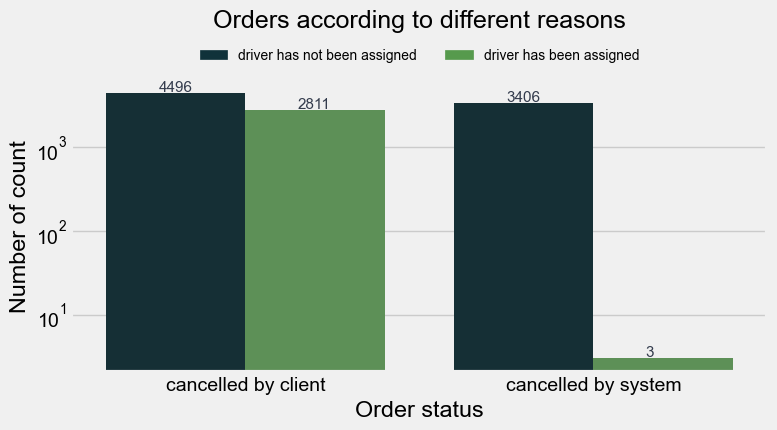

In [28]:
plt.figure(figsize=(8,4))
plt.subplots_adjust(top = 0.8)
plt.title("Orders according to different reasons",color = "black",y = 1.15,fontsize = 18)

color_list = ["#10323a","#569a4d"]
custom_palette = sns.color_palette(color_list)

sns.set_palette(custom_palette)
bar = sns.barplot(x = "order_status_key" , y = "order_datetime",  hue = "is_driver_assigned_key" , data = g1)
plt.yscale("log")
plt.xticks([0,1], ["cancelled by client","cancelled by system"])  # 替换刻度值，x 是被替换的值
plt.xlabel("Order status")
plt.ylabel("Number of count")

legend_patches = [mpatches.Patch(color=color_list[0], label="driver has not been assigned"),mpatches.Patch(color=color_list[1], label="driver has been assigned")  ]
plt.legend(handles=legend_patches,bbox_to_anchor=(0.5, 1.15), loc='upper center',ncol = 2,fontsize = 10, frameon = False)

for p in bar.patches:
    # 获取条形的位置和高度
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height()/ 0.85

    # 在适当的位置添加文本
    bar.text(
        x, y, "{:.0f}".format(p.get_height()), va="center", color="#343c4d", fontsize=11
    )

# Q2